In [11]:
#!pip install statsmodels.api
#!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm 
import matplotlib.pyplot as plt 


In [2]:
df_tips = sns.load_dataset('tips')
print(df_tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [3]:
x = df_tips['total_bill']
y = df_tips['tip']
print(x)
print(y)

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64
0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64


In [4]:
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           6.69e-34
Time:                        21:01:13   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

In [5]:
xb = df_tips['total_bill']
xb[2]
y[2]

3.5

In [6]:
df_tips = pd.get_dummies(df_tips, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

In [7]:
#print(df_tips.info())

x = df_tips[['total_bill', 'sex_Female', 'smoker_No', 'day_Sat', 'day_Sun']]
y = df_tips['tip']

x = x.astype(int)

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     40.75
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           3.41e-30
Time:                        21:01:14   Log-Likelihood:                -349.49
No. Observations:                 244   AIC:                             711.0
Df Residuals:                     238   BIC:                             732.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8596      0.215      4.002      0.0

- A relevancoa estatistica e determinada pelo valor de P>|t| 
- Caso seja maior do que 0.05 menor é a relevancia. 
- Nesse caso apenas const e total_bill sao relevantes


Prevendo o valor da gorjeta

gorgeta = const + conta_total * 0.1056 

In [ ]:
tamanho = 1000

df = pd.DataFrame({'x': np.random.randint(100, 1000 , size=tamanho), 'y': np.random.poisson(lam=1.5, size=tamanho)})

In [9]:
beta0 = -2
beta1 = 0.004

df['lambda'] = np.exp(beta0 + beta1 * df['x'])

df['y'] = np.random.poisson(lam=df['lambda'])

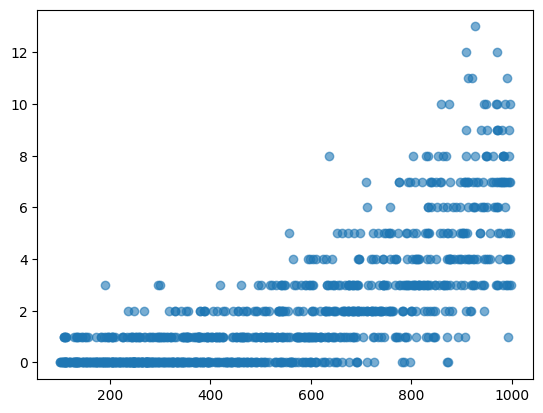

In [10]:
plt.scatter(df['x'],df['y'], alpha=0.6)
plt.show()

In [ ]:
x = sm.add_constant(df['x'])
y = df['y']
print(x)

In [16]:
model = sm.GLM(y,x, family=sm.families.Poisson()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      998
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1411.9
Date:                Mon, 10 Mar 2025   Deviance:                       1027.7
Time:                        21:08:26   Pearson chi2:                     979.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.8234
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0158      0.089    -22.558      0.0

In [24]:
df = pd.DataFrame({'x': np.random.randint(100, 1000 , size=tamanho), 
                'chuva': np.random.choice([0,1], size=tamanho, p=[0.7, 0.3])})

beta0 = -2
beta1 = 0.002
beta2 = 0.5

df['lambda'] = np.exp(beta0 + beta1 * df['x'] + df['chuva'] * beta2)
df['y'] = np.random.poisson(lam=df['lambda'])

x = sm.add_constant(df[['x', 'chuva']])
y = df['y']

model = sm.GLM(y, x, family=sm.families.Poisson()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      997
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -930.87
Date:                Mon, 10 Mar 2025   Deviance:                       974.85
Time:                        21:27:57   Pearson chi2:                     972.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1363
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8656      0.127    -14.675      0.0